In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json



In [2]:
def convert_bytes(size):
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024.0:
            return "%3.2f %s" % (size, x)
        size /= 1024.0

    return size

In [61]:
with open('./callback_memory.json', 'r') as f:
    js = json.load(f)

In [62]:
for i in list(js.keys())[:-2]:
    txt = i +' : '
    for k in list(js[i]):
        txt += k + ' : ' + convert_bytes(js[i][k]) + ' | '
    print(txt)

model : max : 91.57 MB | cur : 91.57 MB | 
input : max : 91.77 MB | cur : 91.77 MB | 
output : max : 2.80 GB | cur : 2.80 GB | 
forward : max : 5.57 GB | cur : 5.57 GB | 
loss : max : 5.76 GB | cur : 5.57 GB | 
backward : max : 8.67 GB | cur : 182.43 MB | 
step : max : 8.67 GB | cur : 182.43 MB | 


In [64]:
f_cur, f_max, b_cur, b_max = [], [], [], []
for fk, bk in zip(js['hookF'], js['hookB']):
    f_cur.append(fk['cur'][0])
    f_max.append(fk['max'][0])
    b_cur.append(bk['cur'][0])
    b_max.append(bk['max'][0])

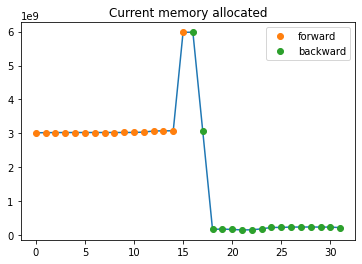

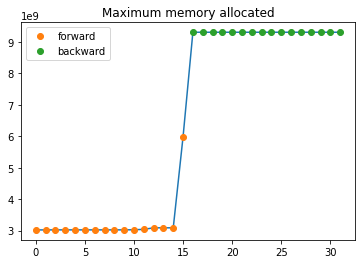

In [66]:
x1, x2 = list(range(len(f_cur))), list(range(len(f_cur),len(f_cur)+len(b_cur)))
plt.plot(x1+x2,f_cur + list(reversed(b_cur)))
plt.plot(x1,f_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,f_max + list(reversed(b_max)))
plt.plot(x1,f_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()

# RevUNet

In [3]:
with open('./callback_rev_memory.json', 'r') as f:
    revjs = json.load(f)
    
    
for i in list(revjs.keys())[:-2]:
    txt = i +' : '
    for k in list(revjs[i]):
        txt += k + ' : ' + convert_bytes(revjs[i][k]) + ' | '
    print(txt)

model : max : 37.33 MB | cur : 37.33 MB | 
input : max : 37.53 MB | cur : 37.53 MB | 
output : max : 2.74 GB | cur : 2.74 GB | 
forward : max : 5.48 GB | cur : 5.48 GB | 
loss : max : 5.67 GB | cur : 5.48 GB | 
backward : max : 8.57 GB | cur : 74.73 MB | 
step : max : 8.57 GB | cur : 74.73 MB | 


In [4]:
revjs['hookF']

[{'max': [2952661504], 'cur': [2952661504]},
 {'max': [2955991040, 9202729984], 'cur': [2955991040, 102995456]},
 {'max': [2962650112, 9202729984], 'cur': [2959320576, 96151040]},
 {'max': [2966974464], 'cur': [2956057088]},
 {'max': [2966974464], 'cur': [2957903360]},
 {'max': [2966974464, 9202729984], 'cur': [2958703616, 100791296]},
 {'max': [2966974464, 9202729984], 'cur': [2959503872, 99079168]},
 {'max': [2966974464], 'cur': [2958210048]},
 {'max': [2966974464], 'cur': [2958578688]},
 {'max': [2966974464, 9202729984], 'cur': [2958763008, 99556352]},
 {'max': [2966974464, 9202729984], 'cur': [2958947328, 98744320]},
 {'max': [2966974464], 'cur': [2958689280]},
 {'max': [2966974464], 'cur': [2958763008]},
 {'max': [2966974464, 9202729984], 'cur': [2958799872, 97026048]},
 {'max': [2966974464, 9202729984], 'cur': [2958836736, 95181824]},
 {'max': [2966974464], 'cur': [2958790656]},
 {'max': [2966974464], 'cur': [2958809088]},
 {'max': [2966974464, 9202729984], 'cur': [2958818304, 87

In [5]:
revjs['hookB']

[{'max': [9202729984], 'cur': [85228544]},
 {'max': [9202729984], 'cur': [109683200]},
 {'max': [9202729984], 'cur': [102838784]},
 {'max': [9202729984], 'cur': [102037504]},
 {'max': [9202729984], 'cur': [96813568]},
 {'max': [9202729984], 'cur': [102503424]},
 {'max': [9202729984], 'cur': [100791296]},
 {'max': [9202729984], 'cur': [100342784]},
 {'max': [9202729984], 'cur': [99078656]},
 {'max': [9202729984], 'cur': [100368384]},
 {'max': [9202729984], 'cur': [99556352]},
 {'max': [9202729984], 'cur': [99039232]},
 {'max': [9202729984], 'cur': [98613248]},
 {'max': [9202729984], 'cur': [98870272]},
 {'max': [9202729984], 'cur': [97026048]},
 {'max': [9202729984], 'cur': [95246336]},
 {'max': [9202729984], 'cur': [94666752]},
 {'max': [9202729984], 'cur': [94729216]},
 {'max': [9202729984], 'cur': [87630848]},
 {'max': [9202729984], 'cur': [80587776]},
 {'max': [9202729984], 'cur': [73489408]},
 {'max': [9202729984], 'cur': [65912832]},
 {'max': [9202729984], 'cur': [66096128]},
 {'m

In [6]:
frev_cur, frev_max, brev_cur, brev_max = [], [], [], []
for fk, bk in zip(revjs['hookF'], revjs['hookB']):
    frev_cur.append(fk['cur'][0])
    frev_max.append(fk['max'][0])
    brev_cur.append(bk['cur'][0])
    brev_max.append(bk['max'][0])

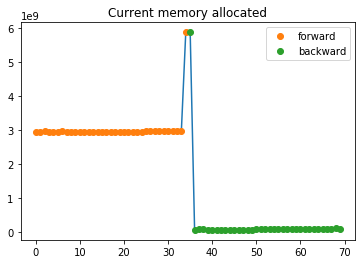

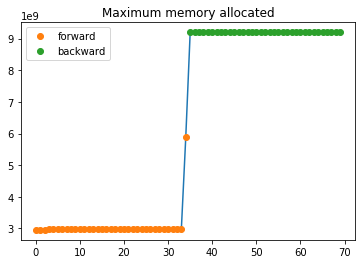

In [8]:
x1, x2 = list(range(len(frev_cur))), list(range(len(frev_cur),len(frev_cur)+len(brev_cur)))
plt.plot(x1+x2,frev_cur + list(reversed(brev_cur)))
plt.plot(x1,frev_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(brev_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,frev_max + list(reversed(brev_max)))
plt.plot(x1,frev_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(brev_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()